#### StudentName: Xhefri Bala
#### Student ID : 7843

####A. Importing libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D, MaxPooling2D, Flatten, Dropout
from google.colab import drive
from keras.models import load_model

####B. Data loading

In [2]:
np.random.seed(100)
path = ""
drive.mount('/content/drive/')
path = "/content/drive/My Drive/Colab Notebooks/images"

#training data path
trn_dta_dir = path + "/train"

#validation data path
val_dta_dir = path + "/validation"

Mounted at /content/drive/


####C. Data augmentation

In [3]:
#training data generator
trn_dta_gtr = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

#validation data generator
val_dta_gtr = ImageDataGenerator(rescale=1./255)

####D. Data preparation

In [4]:

#training generator
trn_gtr = trn_dta_gtr.flow_from_directory(
    trn_dta_dir,
    target_size=(50, 50),
    batch_size=16,
    class_mode="binary")

#validation generator
val_gtr = val_dta_gtr.flow_from_directory(
    val_dta_dir,
    target_size=(50, 50),
    batch_size=16,
    class_mode="binary")


Found 834 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


####E. Model architecture

In [5]:
mdl = Sequential()

mdl.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl.add(Activation("relu"))
mdl.add(MaxPooling2D(pool_size=(2, 2)))

mdl.add(Conv2D(32, (3, 3)))
mdl.add(Activation("relu"))
mdl.add(MaxPooling2D(pool_size=(2, 2)))

mdl.add(Flatten())
mdl.add(Dense(16))
mdl.add(Activation("relu"))
mdl.add(Dropout(0.5))
mdl.add(Dense(1))
mdl.add(Activation("sigmoid"))

mdl.compile(loss="binary_crossentropy",
              optimizer="adamax",
              metrics=["accuracy"])

####F. Training and Validation

In [6]:
batch_size = 16
hist = mdl.fit(
              trn_gtr,
              steps_per_epoch=len(trn_gtr.filenames)//batch_size,
              epochs=100,
              validation_data=val_gtr,
              validation_steps=len(val_gtr.filenames)//batch_size
              )

Epoch 1/100
52/52 [==============================] - 378s 7s/step - loss: 0.6985 - accuracy: 0.5575 - val_loss: 0.6696 - val_accuracy: 0.5000
Epoch 2/100
52/52 [==============================] - 6s 114ms/step - loss: 0.6435 - accuracy: 0.6282 - val_loss: 0.5632 - val_accuracy: 0.8333
Epoch 3/100
52/52 [==============================] - 6s 113ms/step - loss: 0.5687 - accuracy: 0.7413 - val_loss: 0.5212 - val_accuracy: 0.7396
Epoch 4/100
52/52 [==============================] - 6s 113ms/step - loss: 0.5354 - accuracy: 0.7414 - val_loss: 0.3929 - val_accuracy: 0.9271
Epoch 5/100
52/52 [==============================] - 6s 114ms/step - loss: 0.4491 - accuracy: 0.7967 - val_loss: 0.3299 - val_accuracy: 0.8958
Epoch 6/100
52/52 [==============================] - 6s 115ms/step - loss: 0.3972 - accuracy: 0.8492 - val_loss: 0.2787 - val_accuracy: 0.9271
Epoch 7/100
52/52 [==============================] - 6s 113ms/step - loss: 0.3476 - accuracy: 0.8792 - val_loss: 0.2642 - val_accuracy: 0.9479


####G. Plot Loss Functions

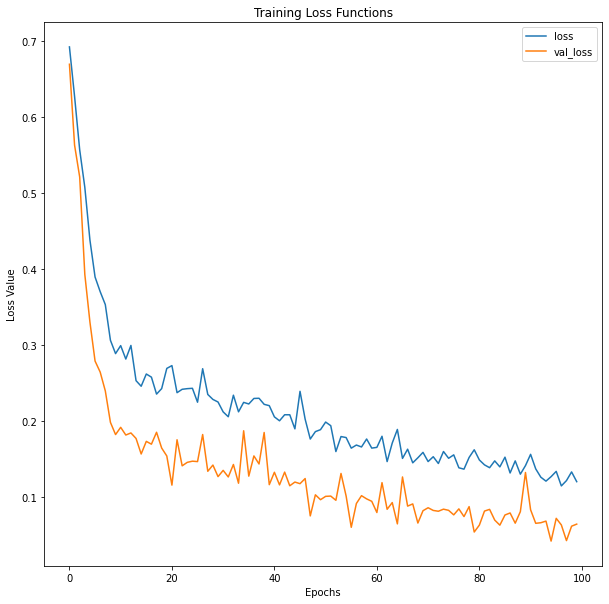

In [8]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/loss_fig.png')
plt.show()

####H. Save the model

In [13]:
mdl.save("/content/drive/My Drive/Colab Notebooks/images/model_7843.h5")